In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
pricing = pd.read_csv("./dim_pricing.csv")
Stations = pd.read_csv("./dim_station.csv")
time = pd.read_csv("./dim_time.csv")
weather = pd.read_csv("./dim_weather.csv")
trips = pd.read_csv("./fact_od_trips.csv")
passenger = pd.read_csv("./fact_passenger_counts.csv")
service = pd.read_csv("./fact_service_events.csv")

In [4]:
# Preview first 5 rows
print(pricing.head())
print(Stations.head())
print(time.head())
print(weather.head())
print(trips.head())
print(passenger.head())
print(service.head())

   zone_id         station_range  price_egp
0        1                   1-9          8
1        2                 10-16         12
2        3                 17-23         15
3        4                   24+         20
4        5  monthly_subscription        150
   station_id       station_name line_id  line_position  latitude  longitude  \
0           1             Helwan   Line1              1   29.8500    31.3344   
1           2         Ain Helwan   Line1              2   29.8617    31.3250   
2           3  Helwan University   Line1              3   29.8697    31.3194   
3           4           Wadi Hof   Line1              4   29.8792    31.3139   
4           5     Hadayek Helwan   Line1              5   29.8972    31.3047   

   passenger_base  is_business_area popularity_level  is_transfer  
0            1400             False           medium        False  
1             900             False              low        False  
2            2800              True        very_hig

In [5]:
# Check shape (rows, columns)
print(pricing.shape, Stations.shape, time.shape, weather.shape, trips.shape, passenger.shape, service.shape)


(7, 3) (80, 10) (8784, 17) (8784, 7) (862573, 10) (702720, 7) (800, 10)


In [6]:
# Data info
print(pricing.info())
print(Stations.info())
print(time.info())
print(weather.info())
print(trips.info())
print(passenger.info())
print(service.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   zone_id        7 non-null      int64 
 1   station_range  7 non-null      object
 2   price_egp      7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station_id        80 non-null     int64  
 1   station_name      80 non-null     object 
 2   line_id           80 non-null     object 
 3   line_position     80 non-null     int64  
 4   latitude          80 non-null     float64
 5   longitude         80 non-null     float64
 6   passenger_base    80 non-null     int64  
 7   is_business_area  80 non-null     bool   
 8   popularity_level  80 non-null     object 
 9   

In [7]:
# Handle Missing Values
print(pricing.isnull().sum())
print(Stations.isnull().sum())
print(time.isnull().sum())
print(weather.isnull().sum())
print(trips.isnull().sum())
print(passenger.isnull().sum())
print(service.isnull().sum())

zone_id          0
station_range    0
price_egp        0
dtype: int64
station_id          0
station_name        0
line_id             0
line_position       0
latitude            0
longitude           0
passenger_base      0
is_business_area    0
popularity_level    0
is_transfer         0
dtype: int64
time_id                 0
datetime                0
date                    0
year                    0
month                   0
day                     0
day_of_week             0
hour                    0
is_weekend              0
is_friday               0
period_of_day           0
special_event        4632
day_type                0
season                  0
is_ramadan              0
is_holiday              0
is_school_holiday       0
dtype: int64
weather_id      0
date            0
month           0
day             0
hour            0
temp_celsius    0
weather_desc    0
dtype: int64
id                        0
origin_station_id         0
destination_station_id    0
time_id            

In [8]:
# Fill missing numeric with mean/median
weather['temp_celsius'] = weather['temp_celsius'].fillna(weather['temp_celsius'].mean())

# Fill missing categories with 'Unknown'
service['reason'] = service['reason'].fillna('Unknown')

# Replace null with "No Event"
time['special_event'] = time['special_event'].fillna('No Event')


In [9]:
# Convert Dates to datetime
trips['date'] = pd.to_datetime(trips['date'])
passenger['date'] = pd.to_datetime(passenger['date'])
service['date'] = pd.to_datetime(service['date'])
time['date'] = pd.to_datetime(time['date'])
weather['date'] = pd.to_datetime(weather['date'])

In [10]:
for name, df in {
    "Pricing": pricing,
    "Stations": Stations,
    "Time": time,
    "Weather": weather,
    "Trips": trips,
    "Passenger": passenger,
    "Service": service
}.items():
    print(f"{name}: {df.duplicated().sum()} duplicated rows")


Pricing: 0 duplicated rows
Stations: 0 duplicated rows
Time: 0 duplicated rows
Weather: 0 duplicated rows
Trips: 0 duplicated rows
Passenger: 0 duplicated rows
Service: 0 duplicated rows


In [11]:
# Remove Duplicates
pricing.drop_duplicates(inplace=True)
Stations.drop_duplicates(inplace=True)
time.drop_duplicates(inplace=True)
weather.drop_duplicates(inplace=True)
trips.drop_duplicates(inplace=True)
passenger.drop_duplicates(inplace=True)
service.drop_duplicates(inplace=True)

In [12]:
# Function to Capitalize String Columns and replace "_"
def clean_and_titlecase(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = (
            df[col]
            .str.strip()                
            .str.replace("_", " ")      
            .str.title()                
        )
    return df


In [13]:
# Reformating Data
pricing = clean_and_titlecase(pricing)
Stations = clean_and_titlecase(Stations)
time = clean_and_titlecase(time)
weather = clean_and_titlecase(weather)
trips = clean_and_titlecase(trips)
passenger = clean_and_titlecase(passenger)
service = clean_and_titlecase(service)


In [14]:
trips["trip_distance_category"] = pd.cut(
    trips["stations_traveled"],
    bins=[0, 5, 15, 25, 31],
    labels=["Short", "Medium", "Long", "Very Long"],
    include_lowest=True
)


In [15]:
# Convert to NumPy array
stations_array = trips["stations_traveled"].to_numpy()

# Compute mean of valid values (>0)
mean_stations = stations_array[stations_array > 0].mean()

# Replace 0 with mean (rounded to integer)
stations_array = np.where(stations_array == 0, round(mean_stations), stations_array)

# Assign back to DataFrame
trips["stations_traveled"] = stations_array


In [16]:
time["quarter"] = time["date"].dt.quarter

In [17]:
time["is_rush_hour"] = time["hour"].isin([7, 8, 9, 16, 17, 18])


In [18]:
passenger["revenue"] = passenger["passenger_count"] * 12.6
print(passenger["revenue"].sum())

46257028561.8


In [19]:
# import os

# os.makedirs("cleaned_data", exist_ok=True)

# pricing.to_csv("cleaned_data/pricing.csv", index=False)
# Stations.to_csv("cleaned_data/stations.csv", index=False)
# time.to_csv("cleaned_data/time.csv", index=False)
# weather.to_csv("cleaned_data/weather.csv", index=False)
# trips.to_csv("cleaned_data/trips.csv", index=False)
# passenger.to_csv("cleaned_data/passenger.csv", index=False)
# service.to_csv("cleaned_data/service.csv", index=False)


In [20]:
# Total passengers 
# Average passengers 
# Total revenue 
# Average revenue 
# Most Revenue Station
# Most Revenue Line
# Total number of service 
# Average event duration 
# % of severe events (High/Critical severity ÷ total events) 
# Total Trips 
# Average trips length
# Average Trips per Day
# Most Used Station
# Least Used Station
# Most Crowded Station (station[passenger_base]/passenger[passenger_count])
# Least Crowded Station (station[passenger_base]/passenger[passenger_count])
# Most Frequent Service Event Type
# Average Service Events per Month
# Station with Most Service Issues
# Most Crowded 3Hours (crowed 3hours in each day and take the most repetitive one)

In [21]:

# === KPIs ===

# 1. Total passengers
total_passengers = passenger["passenger_count"].sum()

# 2. Average passengers
avg_passengers = passenger["passenger_count"].sum() / 365

# 3. Total revenue
total_revenue = passenger["revenue"].sum()

# 4. Average revenue
avg_revenue = passenger["revenue"].sum() / 365

# 5. Most Revenue Station (by origin + destination)
station_revenue = (
    passenger.groupby("station_id")["revenue"].sum().reset_index()
)

station_revenue = station_revenue.merge(
    Stations[["station_id", "station_name"]],
    on="station_id", how="left"
)

most_revenue_station_id = station_revenue["revenue"].idxmax()
most_revenue_station = Stations.loc[Stations["station_id"] == most_revenue_station_id, "station_name"].iloc[0]

# 6. Most Revenue Line
station_line_revenue = station_revenue.reset_index().merge(Stations, left_on="index", right_on="station_id")
most_revenue_line = station_line_revenue.groupby("line_id")["revenue"].sum().idxmax()

# 7. Total number of service events
total_service_events = service.shape[0]

# 8. Average event duration
avg_event_duration = service["event_duration_min"].mean()

# 9. % of severe events
severe_events = service[service["severity"].isin(["High"])].shape[0]
percent_severe = (severe_events / total_service_events) * 100

# 10. Total trips
total_trips = trips.shape[0]

# 11. Average trip length
avg_trip_length = trips["stations_traveled"].mean()

# 12. Average Trips per Day
avg_trips_per_day = trips.groupby("date")["id"].count().mean()

# 13. Most Used Station
most_used_station_id = passenger.groupby("station_id")["passenger_count"].sum().idxmax()
most_used_station = Stations.loc[Stations["station_id"] == most_used_station_id, "station_name"].iloc[0]

# 14. Least Used Station
least_used_station_id = passenger.groupby("station_id")["passenger_count"].sum().idxmin()
least_used_station = Stations.loc[Stations["station_id"] == least_used_station_id, "station_name"].iloc[0]

# 15 & 16. Most/Least Crowded Station
station_passengers = passenger.groupby("station_id")["passenger_count"].sum().reset_index()
crowd_ratio = Stations.merge(station_passengers, on="station_id", how="left")
crowd_ratio["crowd_ratio"] = crowd_ratio["passenger_count"] / crowd_ratio["passenger_base"]

most_crowded_station = crowd_ratio.loc[crowd_ratio["crowd_ratio"].idxmax(), "station_name"]
least_crowded_station = crowd_ratio.loc[crowd_ratio["crowd_ratio"].idxmin(), "station_name"]

# 17. Most Frequent Service Event Type
most_freq_event_type = service["event_type"].mode()[0]

# 18. Average Service Events per Month
avg_service_per_month = service.groupby("month")["id"].count().mean()

# 19. Station with Most Service Issues
station_most_issues_id = service["station_id"].value_counts().idxmax()
station_most_issues = Stations.loc[Stations["station_id"] == station_most_issues_id, "station_name"].iloc[0]


# ==== Print KPI Report ====
print("📊 Metro KPI Report")
print("Total Passengers:", total_passengers)
print("Average Passengers:", round(avg_passengers, 2))
print("Total Revenue:", total_revenue)
print("Average Revenue:", round(avg_revenue, 2))
print("Most Revenue Station:", most_revenue_station)
print("Most Revenue Line:", most_revenue_line)
print("Total Service Events:", total_service_events)
print("Average Event Duration (min):", round(avg_event_duration, 2))
print("% Severe Events:", round(percent_severe, 2), "%")
print("Total Trips:", total_trips)
print("Average Trip Length (Stations):", round(avg_trip_length, 2))
print("Average Trips per Day:", round(avg_trips_per_day, 2))
print("Most Used Station:", most_used_station)
print("Least Used Station:", least_used_station)
print("Most Crowded Station:", most_crowded_station)
print("Least Crowded Station:", least_crowded_station)
print("Most Frequent Service Event Type:", most_freq_event_type)
print("Average Service Events per Month:", round(avg_service_per_month, 2))
print("Station with Most Service Issues:", station_most_issues)


📊 Metro KPI Report
Total Passengers: 3671192743
Average Passengers: 10058062.31
Total Revenue: 46257028561.8
Average Revenue: 126731585.1
Most Revenue Station: Sadat
Most Revenue Line: Line3
Total Service Events: 800
Average Event Duration (min): 65.24
% Severe Events: 28.75 %
Total Trips: 862573
Average Trip Length (Stations): 14.04
Average Trips per Day: 2356.76
Most Used Station: Al Shohadaa
Least Used Station: Kozzika
Most Crowded Station: Sadat
Least Crowded Station: Ain Helwan
Most Frequent Service Event Type: Maintenance
Average Service Events per Month: 66.67
Station with Most Service Issues: Saad Zaghloul


In [22]:
# === Theme Setup ===
DARK_RED = "#8B0000"
DARK_GRAY = "#212121"

sns.set_theme(
    style="whitegrid",
    rc={
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "axes.edgecolor": DARK_GRAY,
        "grid.color": "#e0e0e0",
        "text.color": DARK_GRAY,
        "axes.labelcolor": DARK_GRAY,
        "xtick.color": DARK_GRAY,
        "ytick.color": DARK_GRAY
    }
)
sns.set_palette([DARK_RED])


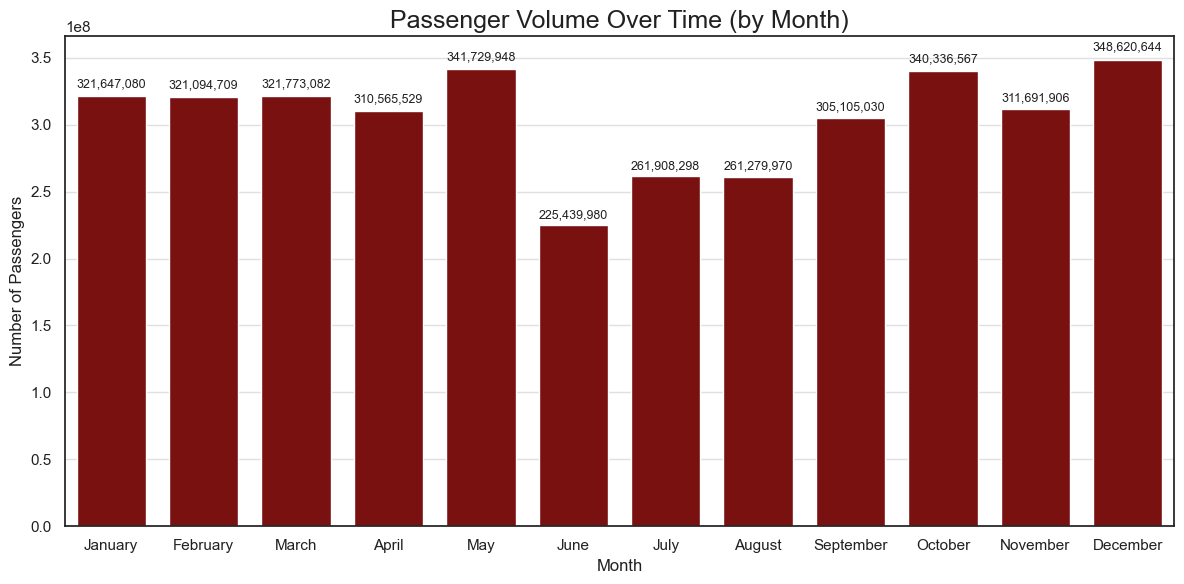

In [23]:
passengers_per_month = (
    passenger.groupby(passenger["date"].dt.month_name())["passenger_count"].sum().reset_index()
)
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
passengers_per_month["date"] = pd.Categorical(
    passengers_per_month["date"], categories=month_order, ordered=True
)
passengers_per_month = passengers_per_month.sort_values("date")

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=passengers_per_month, 
    x="date", y="passenger_count", 
    color=DARK_RED,
    width=0.75
)

plt.title("Passenger Volume Over Time (by Month)", fontsize=18, color=DARK_GRAY)
plt.xlabel("Month")
plt.ylabel("Number of Passengers")

for p in ax.patches:
    ax.text( 
        p.get_x() + p.get_width() / 2,
        p.get_height() * 1.02, 
        f'{int(p.get_height()):,}', 
        ha='center', color=DARK_GRAY, fontsize=9
    )

plt.tight_layout()
plt.show()


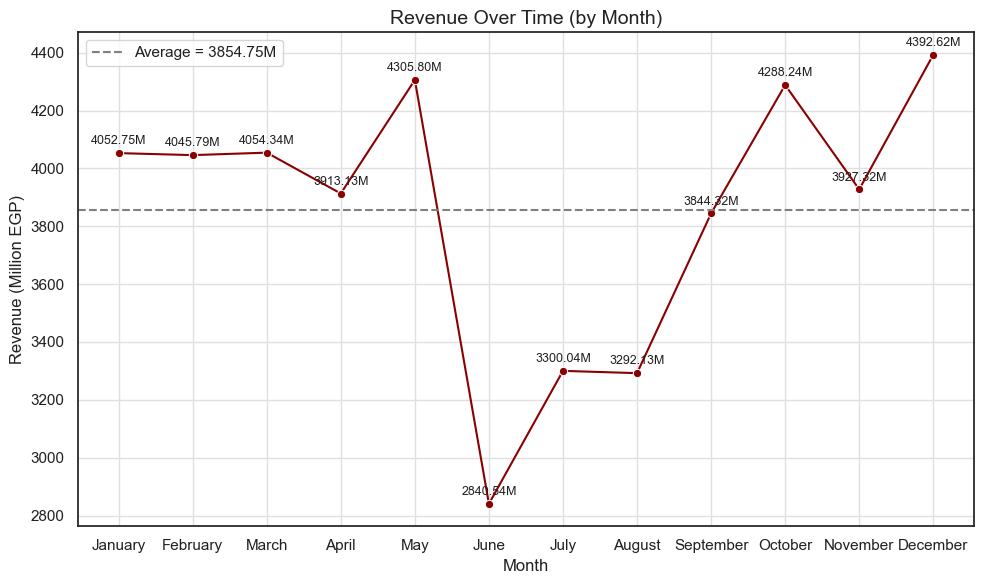

In [24]:
revenue_per_month = (
    passenger.groupby(passenger["date"].dt.month_name())["revenue"]
    .sum()
    .reset_index()
    .rename(columns={"date": "month", "revenue": "revenue"})
)

revenue_per_month["month"] = pd.Categorical(
    revenue_per_month["month"], categories=month_order, ordered=True
)
revenue_per_month = revenue_per_month.sort_values("month")

revenue_per_month["revenue_million"] = revenue_per_month["revenue"] / 1e6

avg_revenue = revenue_per_month["revenue_million"].mean()

plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=revenue_per_month,
    x="month",
    y="revenue_million",
    marker="o",
    color=DARK_RED
)

plt.axhline(avg_revenue, color="gray", linestyle="--", linewidth=1.5, label=f"Average = {avg_revenue:.2f}M")

plt.title("Revenue Over Time (by Month)", fontsize=14, color=DARK_GRAY)
plt.xlabel("Month")
plt.ylabel("Revenue (Million EGP)")

for x, y in zip(revenue_per_month["month"], revenue_per_month["revenue_million"]):
    plt.text(
        x, y + 20, f"{y:.2f}M",
        ha="center", va="bottom",
        fontsize=9, color=DARK_GRAY
    )

plt.legend()
plt.tight_layout()
plt.show()


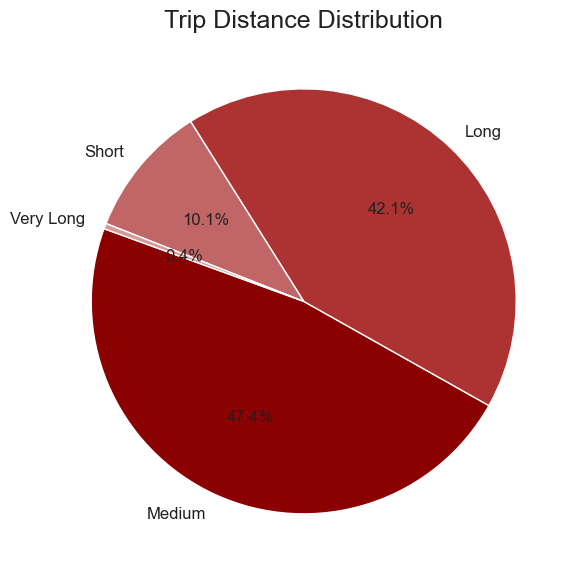

In [25]:
distance_counts = trips["trip_distance_category"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    distance_counts.values, 
    labels=distance_counts.index, 
    autopct='%1.1f%%', 
    startangle=160, 
    colors=[DARK_RED, (0.6,0,0,0.8), (0.6,0,0,0.6), (0.6,0,0,0.4)],  
    textprops={"color": DARK_GRAY, "fontsize": 12}
)

plt.title("Trip Distance Distribution", fontsize=18, color=DARK_GRAY)
plt.tight_layout()
plt.show()


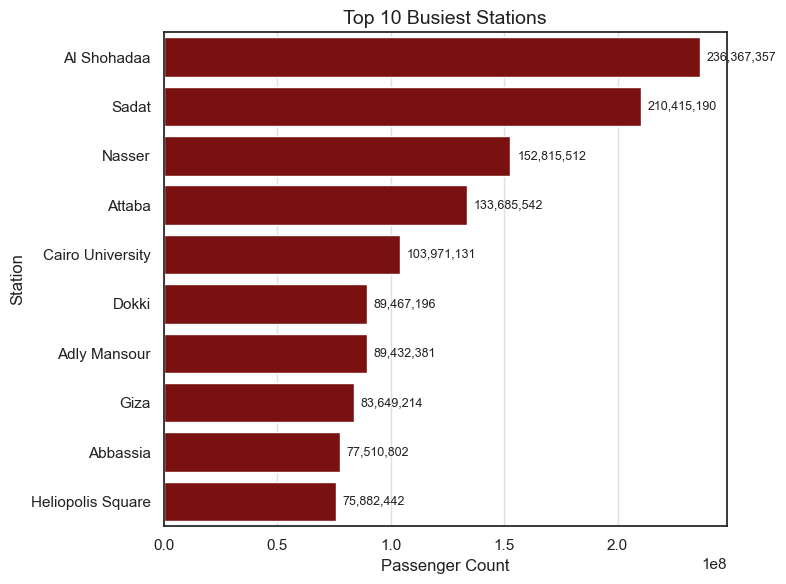

In [26]:
station_passengers = passenger.groupby("station_id")["passenger_count"].sum().reset_index()
station_passengers = station_passengers.merge(Stations[["station_id", "station_name"]], on="station_id")
top10_stations = station_passengers.sort_values("passenger_count", ascending=False).head(10)
plt.figure(figsize=(8,6))
ax = sns.barplot(data=top10_stations, y="station_name", x="passenger_count", color=DARK_RED)

plt.title("Top 10 Busiest Stations", fontsize=14, color=DARK_GRAY)
plt.xlabel("Passenger Count")
plt.ylabel("Station")

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width()):,}",   
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="left", va="center",
        fontsize=9, color=DARK_GRAY, xytext=(5,0), textcoords="offset points"
    )

plt.tight_layout()
plt.show()


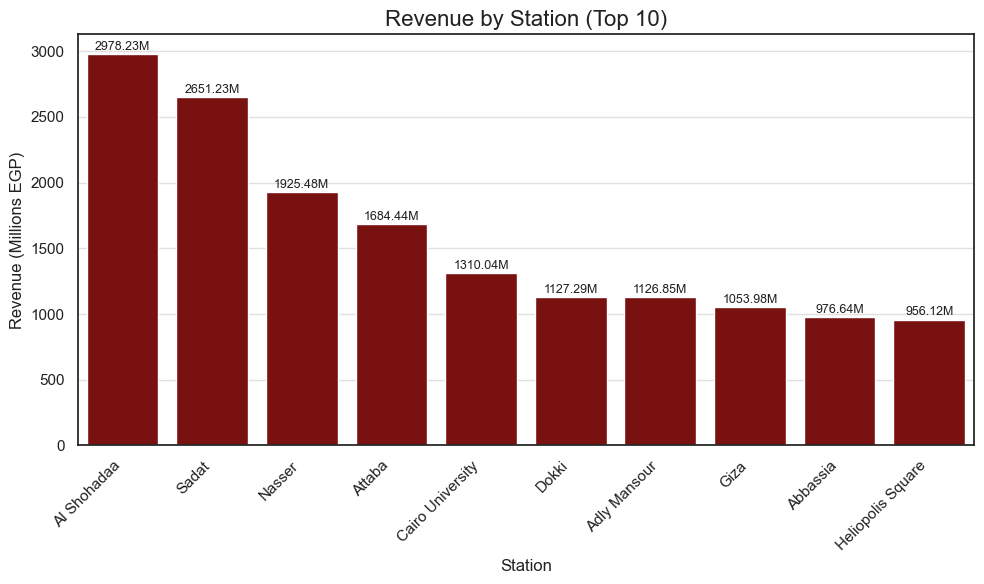

In [27]:
station_revenue = (
    passenger.groupby("station_id")["revenue"].sum().reset_index()
)
station_revenue = station_revenue.merge(
    Stations[["station_id", "station_name"]], on="station_id"
)
top10_revenue = station_revenue.sort_values("revenue", ascending=False).head(10)

top10_revenue["revenue_millions"] = top10_revenue["revenue"] / 1e6

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top10_revenue, 
    x="station_name", 
    y="revenue_millions", 
    color=DARK_RED
)

plt.title("Revenue by Station (Top 10)", fontsize=16, color=DARK_GRAY)
plt.xlabel("Station")
plt.ylabel("Revenue (Millions EGP)")
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}M",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color=DARK_GRAY, xytext=(0, 1), textcoords="offset points"
    )

plt.tight_layout()
plt.show()


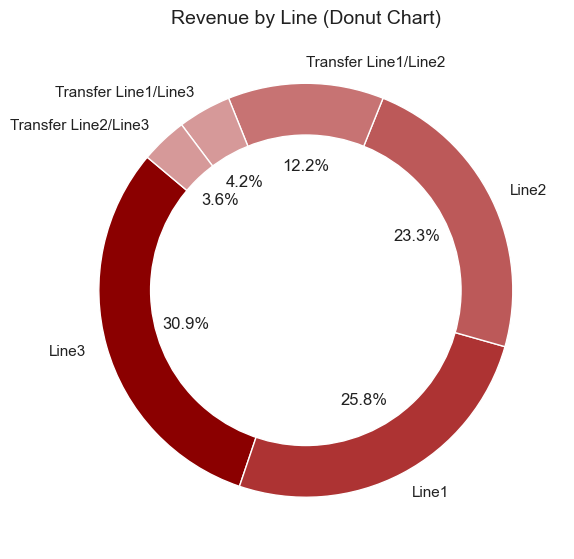

In [28]:
station_line_revenue = station_revenue.merge(
    Stations[["station_id", "line_id"]], on="station_id"
)

line_revenue = (
    station_line_revenue.groupby("line_id")["revenue"].sum().reset_index()
)

line_revenue = line_revenue.sort_values("revenue", ascending=False).reset_index(drop=True)

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(
    line_revenue["revenue"],
    labels=line_revenue["line_id"],
    autopct='%1.1f%%',
    startangle=140,
    colors=[DARK_RED, (0.6,0,0,0.80), (0.6,0,0,0.65) , (0.6,0,0,0.55) , (0.6,0,0,0.4) , (0.6,0,0,0.4)],
    textprops={"color": DARK_GRAY}
)
centre_circle = plt.Circle((0,0),0.75,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Revenue by Line (Donut Chart)", fontsize=14, color=DARK_GRAY)
plt.tight_layout()
plt.show()


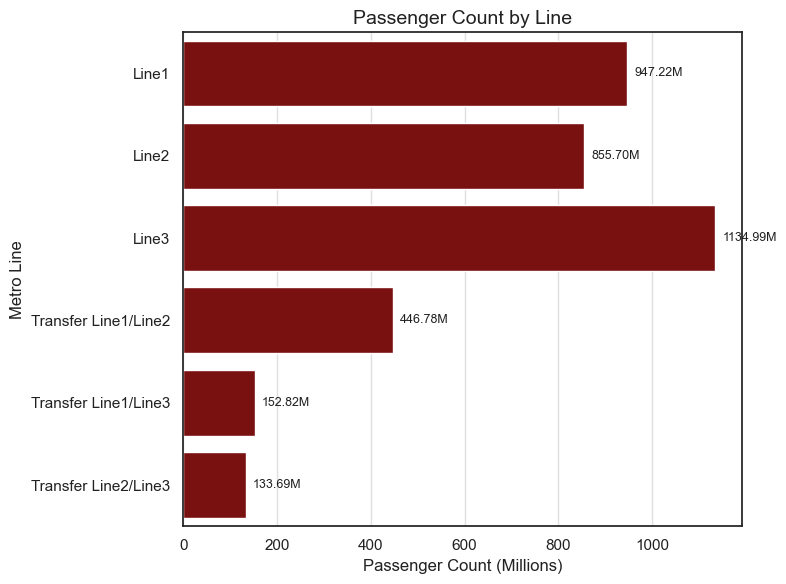

In [29]:
line_passengers = passenger.merge(Stations[["station_id", "line_id"]], on="station_id")
line_passengers = line_passengers.groupby("line_id")["passenger_count"].sum().reset_index()

line_passengers["passenger_count_million"] = line_passengers["passenger_count"] / 1_000_000

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=line_passengers, 
    y="line_id", 
    x="passenger_count_million", 
    color=DARK_RED
)

plt.title("Passenger Count by Line", fontsize=14, color=DARK_GRAY)
plt.xlabel("Passenger Count (Millions)")
plt.ylabel("Metro Line")

for p in ax.patches:
    ax.annotate(
        f"{p.get_width():.2f}M",  
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="left", va="center",
        fontsize=9, color=DARK_GRAY, xytext=(5,0), textcoords="offset points"
    )

plt.tight_layout()
plt.show()


C:\Users\iTECH\AppData\Local\Temp\ipykernel_13208\199688363.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_with_trips.groupby("trip_length_category")["passenger_count"].sum().reset_index()


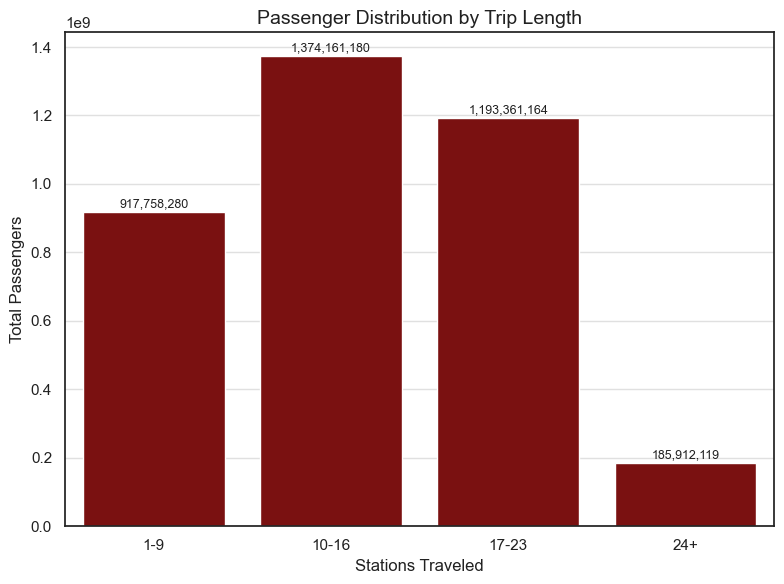

In [30]:
passenger_with_trips = passenger.merge(
    trips[["id", "stations_traveled"]], 
    left_on="id", right_on="id", 
    how="left"
)

bins = [0, 9, 16, 23, passenger_with_trips["stations_traveled"].max()]
labels = ["1-9", "10-16", "17-23", "24+"]

passenger_with_trips["trip_length_category"] = pd.cut(
    passenger_with_trips["stations_traveled"], bins=bins, labels=labels, include_lowest=True
)

passenger_by_length = (
    passenger_with_trips.groupby("trip_length_category")["passenger_count"].sum().reset_index()
)

plt.figure(figsize=(8,6))
sns.barplot(
    x=passenger_by_length["trip_length_category"], 
    y=passenger_by_length["passenger_count"], 
    color=DARK_RED
)

plt.title("Passenger Distribution by Trip Length", fontsize=14, color=DARK_GRAY)
plt.xlabel("Stations Traveled")
plt.ylabel("Total Passengers")

for i, v in enumerate(passenger_by_length["passenger_count"]):
    plt.text(i, v + 0.01 * max(passenger_by_length["passenger_count"]), f"{v:,}", 
             ha="center", color=DARK_GRAY, fontsize=9)

plt.tight_layout()
plt.show()


In [46]:
import folium
from folium.features import DivIcon

# Approximate coordinates for Egypt's label (adjust if needed)


line_colors = {
    "Line1": "red",
    "Line2": "blue",
    "Line3": "green"
}

station_stats = (
    passenger.groupby("station_id")[["passenger_count", "revenue"]].sum().reset_index()
)

station_stats = station_stats.merge(
    Stations[["station_id", "station_name", "latitude", "longitude", "line_id"]],
    on="station_id",
    how="left"
)

center_lat = station_stats["latitude"].mean()
center_lon = station_stats["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles="cartodbpositron")
egypt_lat, egypt_lon = 31.0461, 34.8516  

folium.map.Marker(
    [egypt_lat, egypt_lon],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 18px; color: red; font-weight: bold;">Palestine</div>',
    )
).add_to(m)

for _, row in station_stats.iterrows():
    if "Transfer" in str(row["line_id"]):
        color = "black"
    else:
        color = line_colors.get(row["line_id"], "gray")

    popup_html = f"""
    <b>{row['station_name']}</b><br>
    👥 Passengers: {row['passenger_count']:,}<br>
    💰 Revenue: {row['revenue'] / 1_000_000:.2f}M EGP<br>
    🚇 Line: {row['line_id']}
    """

    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.9,
        tooltip=row["station_name"],
        popup=folium.Popup(popup_html, max_width=300)
    ).add_to(m)

m.save("metro_network_map.html")


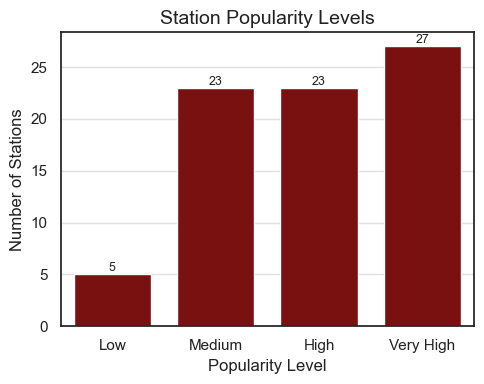

In [32]:
popularity_counts = Stations["popularity_level"].value_counts().reset_index()
popularity_counts.columns = ["popularity_level", "count"]

order = ["Low", "Medium", "High", "Very High"]
popularity_counts["popularity_level"] = pd.Categorical(popularity_counts["popularity_level"], categories=order, ordered=True)
popularity_counts = popularity_counts.sort_values("popularity_level")

plt.figure(figsize=(5,4))
ax = sns.barplot(
    data=popularity_counts,
    x="popularity_level",
    y="count",
    color=DARK_RED,
    width=0.75,
)

plt.title("Station Popularity Levels", fontsize=14, color=DARK_GRAY)
plt.xlabel("Popularity Level")
plt.ylabel("Number of Stations")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=0.2, color=DARK_GRAY, fontsize=9)

plt.tight_layout()
plt.show()


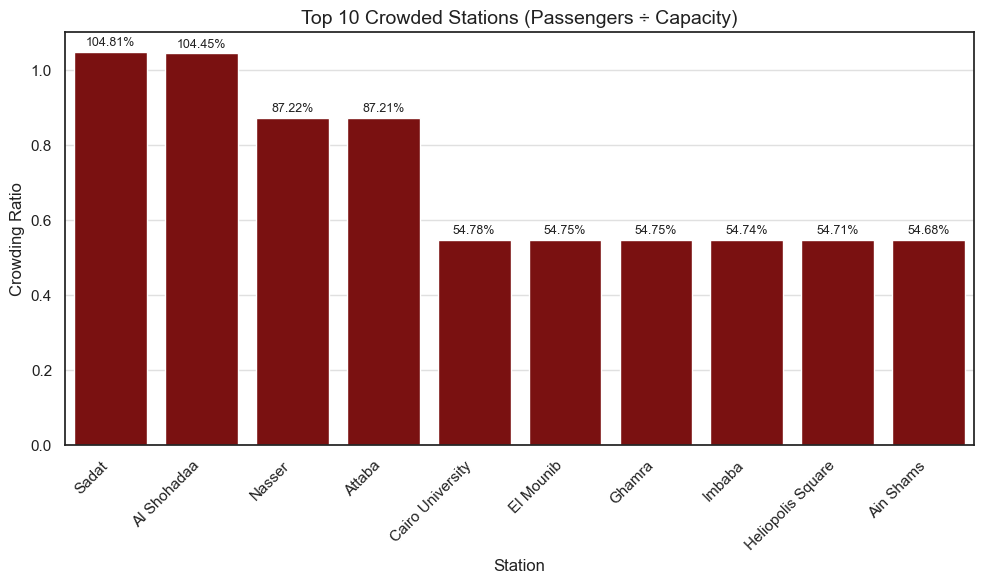

In [ ]:
station_passengers = (
    passenger.groupby("station_id")["passenger_count"].sum().reset_index()
)
crowd_data = station_passengers.merge(
    Stations[["station_id", "station_name", "passenger_base"]],
    on="station_id",
    how="left"
)

crowd_data["annual_capacity"] = crowd_data["passenger_base"] * 365

crowd_data["crowding_ratio"] = crowd_data["passenger_count"] / crowd_data["annual_capacity"] / 100

top10_crowded = crowd_data.sort_values("crowding_ratio", ascending=False).head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top10_crowded,
    x="station_name",
    y="crowding_ratio",
    color=DARK_RED
)

plt.title("Top 10 Crowded Stations (Passengers ÷ Capacity)", fontsize=14, color=DARK_GRAY)
plt.xlabel("Station")
plt.ylabel("Crowding Ratio")
plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2%}", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color=DARK_GRAY, xytext=(0,2), textcoords="offset points"
    )

plt.tight_layout()
plt.show()


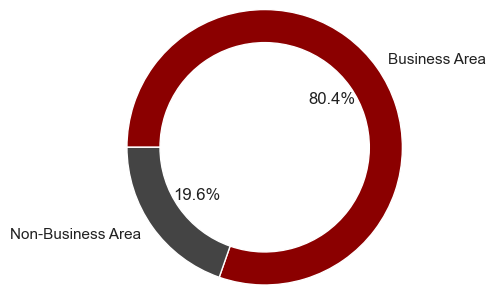

In [ ]:
station_passengers = passenger.groupby("station_id")["passenger_count"].sum().reset_index()
business_usage = station_passengers.merge(
    Stations[["station_id", "station_name", "is_business_area"]],
    on="station_id",
    how="left"
)
business_usage_grouped = business_usage.groupby("is_business_area")["passenger_count"].sum().reset_index()

business_value = business_usage_grouped.loc[business_usage_grouped["is_business_area"] == True, "passenger_count"].sum()
non_business_value = business_usage_grouped.loc[business_usage_grouped["is_business_area"] == False, "passenger_count"].sum()

values = [business_value, non_business_value]

plt.figure(figsize=(5,5))

wedges, texts, autotexts = plt.pie(
    values,
    labels=["Business Area", "Non-Business Area"],
    colors=[DARK_RED, "#444444"],
    autopct=lambda p: f"{p:.1f}%",
    startangle=180,    
    counterclock=False,
    wedgeprops=dict(width=0.24, edgecolor="white")
)

plt.gca().add_patch(plt.Circle((0,0), 0.6, fc="white"))
plt.gca().set(aspect="equal")
plt.ylim(-1, 0.1) 

plt.tight_layout()
plt.show()


C:\Users\iTECH\AppData\Local\Temp\ipykernel_13768\3061826240.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


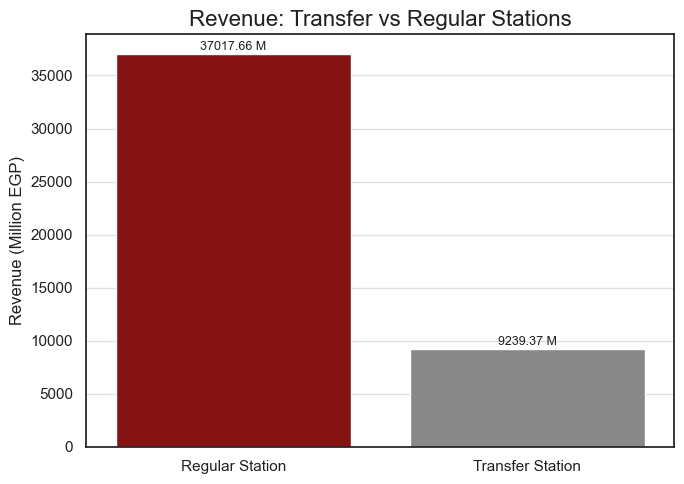

In [ ]:
station_revenue = (
    passenger.groupby("station_id")["revenue"].sum().reset_index()
    .merge(Stations[["station_id", "station_name", "is_transfer"]], on="station_id", how="left")
)
transfer_revenue = (
    station_revenue.groupby("is_transfer")["revenue"]
    .sum()
    .reset_index()
)
transfer_revenue["Station Type"] = transfer_revenue["is_transfer"].map(
    {True: "Transfer Station", False: "Regular Station"}
)
transfer_revenue["Revenue (Million EGP)"] = transfer_revenue["revenue"] / 1e6

plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=transfer_revenue,
    x="Station Type",
    y="Revenue (Million EGP)",
    palette=[(0.6,0,0,0.9), "#888888"]
)
plt.title("Revenue: Transfer vs Regular Stations", fontsize=16, color=DARK_GRAY)
plt.xlabel("")
plt.ylabel("Revenue (Million EGP)")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f} M",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="bottom",
        fontsize=9, color=DARK_GRAY, xytext=(0,0.5), textcoords="offset points"
    )

plt.tight_layout()
plt.show()

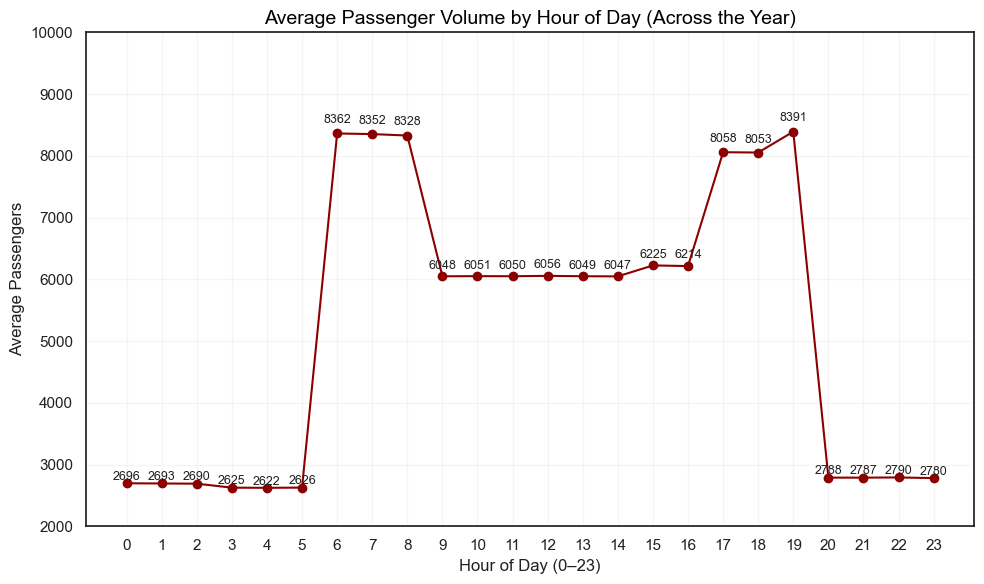

In [ ]:
passenger_time = passenger.merge(time[["time_id", "hour"]], on="time_id", how="left")

avg_passengers_per_hour = (
    passenger_time.groupby("hour")["passenger_count"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,6))
plt.plot(
    avg_passengers_per_hour["hour"],
    avg_passengers_per_hour["passenger_count"],
    marker="o", color=DARK_RED,
)

plt.title("Average Passenger Volume by Hour of Day (Across the Year)", fontsize=14, color="black")
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Average Passengers", fontsize=12)
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.ylim(2000, 10000) 

for x, y in zip(avg_passengers_per_hour["hour"], avg_passengers_per_hour["passenger_count"]):
    plt.text(
        x, y * 1.02, 
        f"{y:.0f}", 
        fontsize=9, color=DARK_GRAY, ha="center"
    )

plt.tight_layout()
plt.show()


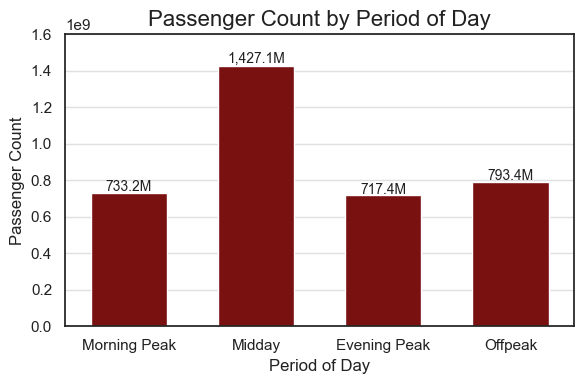

In [ ]:
passenger_period = passenger.groupby("period_of_day")["passenger_count"].sum().reset_index()

order = [ "Morning Peak", "Midday", "Evening Peak", "Offpeak"]
passenger_period["period_of_day"] = pd.Categorical(passenger_period["period_of_day"], categories=order, ordered=True)
passenger_period = passenger_period.sort_values("period_of_day")

plt.figure(figsize=(6,4))
sns.barplot(
    data=passenger_period,
    x="period_of_day",
    y="passenger_count",
    width=0.6,
    color=DARK_RED
)

plt.title("Passenger Count by Period of Day", fontsize=16, color=DARK_GRAY)
plt.xlabel("Period of Day")
plt.ylabel("Passenger Count")
plt.ylim(0,1.6e9)

for i, row in enumerate(passenger_period.itertuples()):
    plt.text(
        i, row.passenger_count * 1.01,
        f"{row.passenger_count/1e6:,.1f}M",
        ha="center", fontsize=10, color=DARK_GRAY
    )

plt.tight_layout()
plt.show()


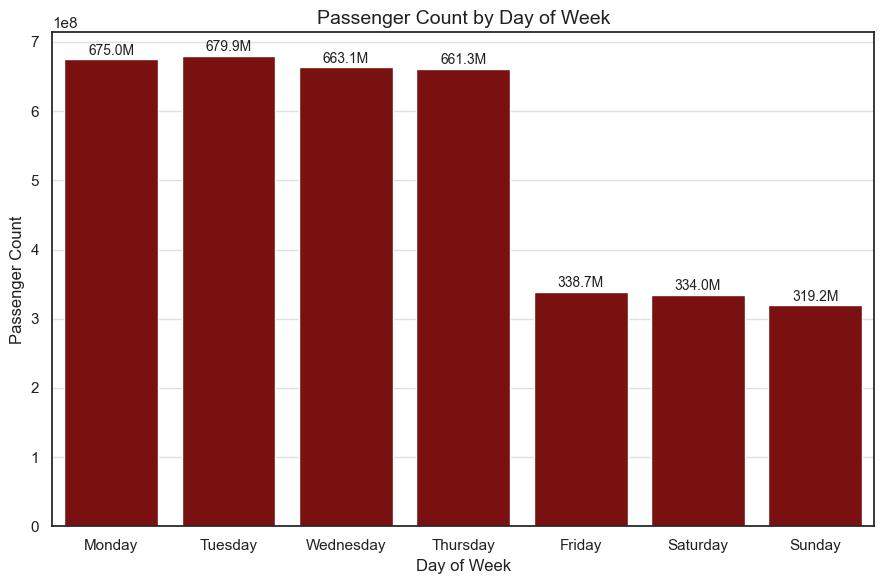

In [ ]:
passenger_days = passenger.merge(time[["time_id", "day_of_week"]], on="time_id", how="left")

passenger_by_day = passenger_days.groupby("day_of_week")["passenger_count"].sum().reset_index()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
passenger_by_day["day_of_week"] = pd.Categorical(passenger_by_day["day_of_week"], categories=order, ordered=True)
passenger_by_day = passenger_by_day.sort_values("day_of_week")

plt.figure(figsize=(9,6))
sns.barplot(
    data=passenger_by_day,
    x="day_of_week",
    y="passenger_count",
    color=DARK_RED
)

plt.title("Passenger Count by Day of Week", fontsize=14, color=DARK_GRAY)
plt.xlabel("Day of Week")
plt.ylabel("Passenger Count")

for i, row in enumerate(passenger_by_day.itertuples()):
    plt.text(
        i, row.passenger_count + 0.01 * passenger_by_day["passenger_count"].max(),
        f"{row.passenger_count/1e6:,.1f}M",
        ha="center", fontsize=10, color=DARK_GRAY
    )

plt.tight_layout()
plt.show()


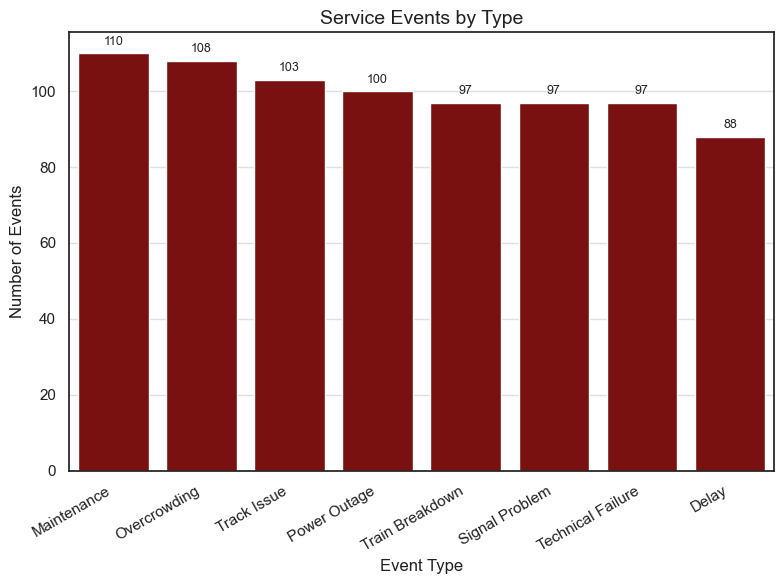

In [ ]:
event_counts = service["event_type"].value_counts().reset_index()
event_counts.columns = ["event_type", "count"]

plt.figure(figsize=(8,6))
sns.barplot(
    data=event_counts,
    x="event_type",
    y="count",
    color=DARK_RED
)

plt.title("Service Events by Type", fontsize=14, color=DARK_GRAY)
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.xticks(rotation=30, ha="right")

for i, row in event_counts.iterrows():
    plt.text(
        i, row["count"] + 0.02 * event_counts["count"].max(),
        f"{row['count']:,}",
        ha="center", color=DARK_GRAY, fontsize=9
    )

plt.tight_layout()
plt.show()


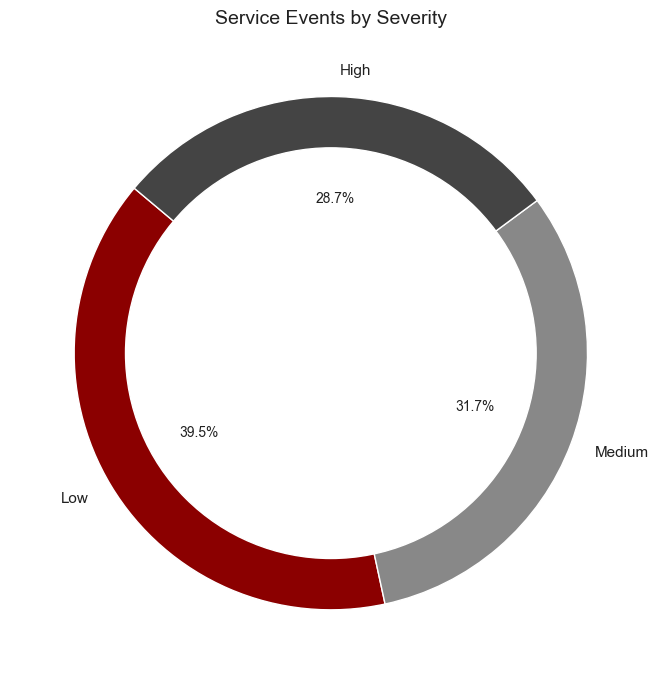

In [ ]:
severity_counts = service["severity"].value_counts().reset_index()
severity_counts.columns = ["severity", "count"]

severity_order = ["Low", "Medium", "High"]
severity_counts["severity"] = pd.Categorical(
    severity_counts["severity"], categories=severity_order, ordered=True
)
severity_counts = severity_counts.sort_values("severity")

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    severity_counts["count"],
    labels=severity_counts["severity"],
    autopct="%1.1f%%",
    startangle=140,
    colors=[DARK_RED, "#888888", "#444444"],
    wedgeprops={"edgecolor": "white"}
)

centre_circle = plt.Circle((0,0), 0.80, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color(DARK_GRAY)
    autotext.set_fontsize(10)

plt.title("Service Events by Severity", fontsize=14, color=DARK_GRAY)
plt.tight_layout()
plt.show()


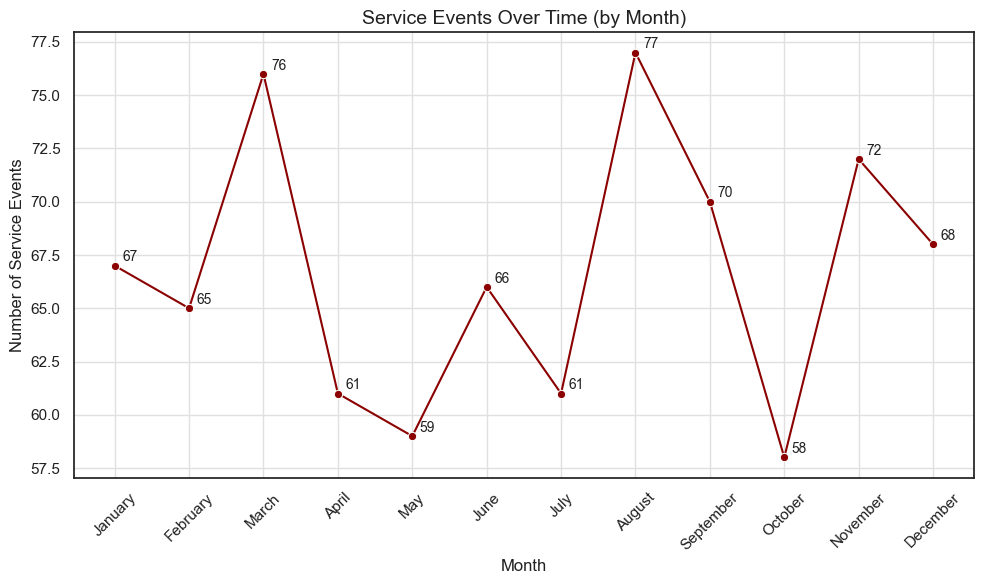

In [ ]:
service["date"] = pd.to_datetime(service["date"])

events_per_month = service.groupby(service["date"].dt.month_name())["id"].count().reset_index()
events_per_month.columns = ["month", "event_count"]

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
events_per_month["month"] = pd.Categorical(events_per_month["month"], categories=month_order, ordered=True)
events_per_month = events_per_month.sort_values("month")

plt.figure(figsize=(10,6))
sns.lineplot(data=events_per_month, x="month", y="event_count", marker="o", color=DARK_RED)

plt.title("Service Events Over Time (by Month)", fontsize=14, color=DARK_GRAY)
plt.xlabel("Month")
plt.ylabel("Number of Service Events")
plt.xticks(rotation=45)

for i, row in enumerate(events_per_month.itertuples()):
    plt.text(i + 0.1, row.event_count + 0.2, f"{row.event_count}", 
             ha="left", fontsize=10, color=DARK_GRAY)

plt.tight_layout()
plt.show()


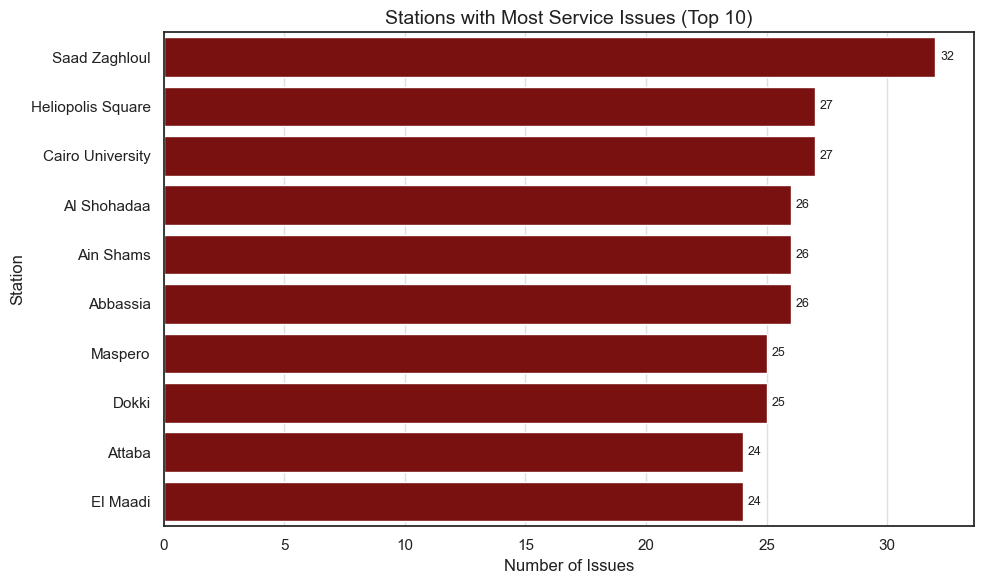

In [ ]:
station_issues = service.groupby("station_id")["id"].count().reset_index(name="issue_count")

station_issues = station_issues.merge(Stations[["station_id", "station_name"]], on="station_id", how="left")

top10_issues = station_issues.sort_values("issue_count", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_issues, y="station_name", x="issue_count", color=DARK_RED)

plt.title("Stations with Most Service Issues (Top 10)", fontsize=14, color=DARK_GRAY)
plt.xlabel("Number of Issues")
plt.ylabel("Station")

for i, row in enumerate(top10_issues.itertuples()):
    plt.text(row.issue_count + 0.2, i, f"{row.issue_count}", 
             va="center", color=DARK_GRAY, fontsize=9)

plt.tight_layout()
plt.show()


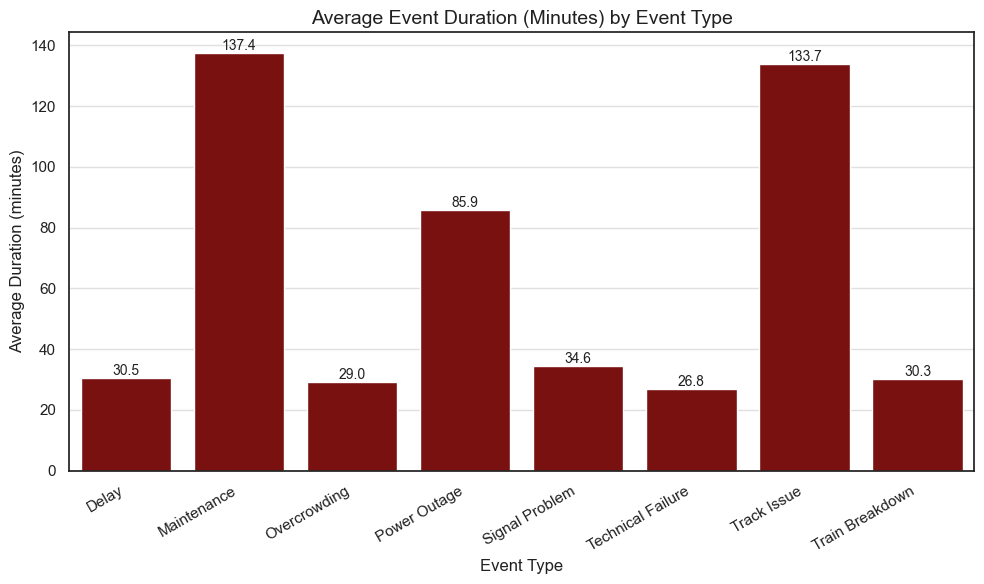

In [ ]:
avg_duration = service.groupby("event_type")["event_duration_min"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_duration,
    x="event_type",
    y="event_duration_min",
    color=DARK_RED
)

plt.title("Average Event Duration (Minutes) by Event Type", fontsize=14, color=DARK_GRAY)
plt.xlabel("Event Type")
plt.ylabel("Average Duration (minutes)")

for i, row in avg_duration.iterrows():
    plt.text(
        i, row["event_duration_min"] + 1,
        f"{row['event_duration_min']:.1f}",
        ha="center", fontsize=10, color=DARK_GRAY
    )

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


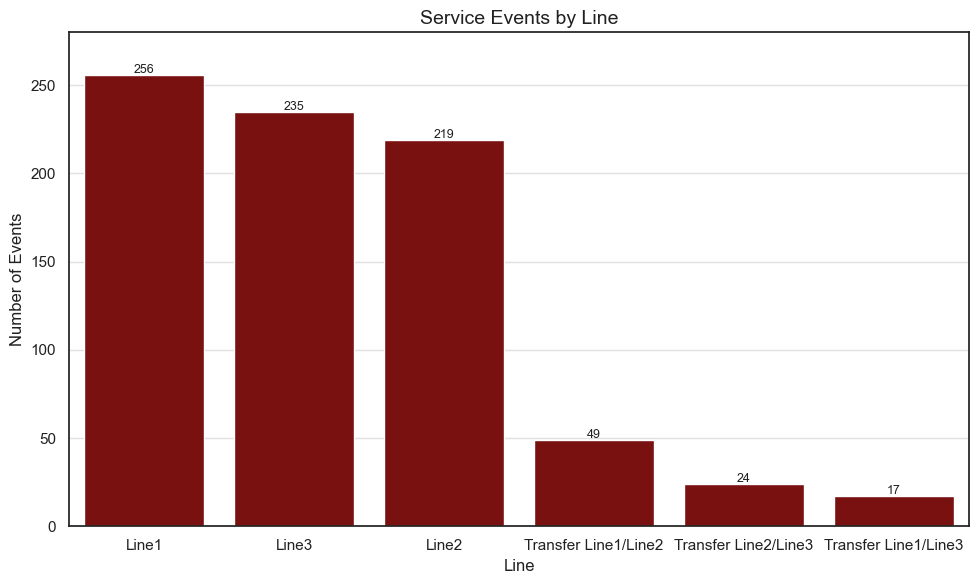

In [ ]:
events_with_lines = service.merge(Stations[["station_id", "line_id"]], on="station_id", how="left")

line_events = events_with_lines.groupby("line_id")["id"].count().reset_index()
line_events.columns = ["line_id", "event_count"]

line_events = line_events.sort_values("event_count", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=line_events,
    x="line_id", y="event_count",
    color=DARK_RED
)

plt.title("Service Events by Line", fontsize=14, color=DARK_GRAY)
plt.xlabel("Line")
plt.ylabel("Number of Events")
plt.ylim(0, 280)
for i, row in enumerate(line_events.itertuples()):
    plt.text(
        i, row.event_count + 1,
        f"{row.event_count:,}",
        ha="center", color=DARK_GRAY, fontsize=9
    )

plt.tight_layout()
plt.show()


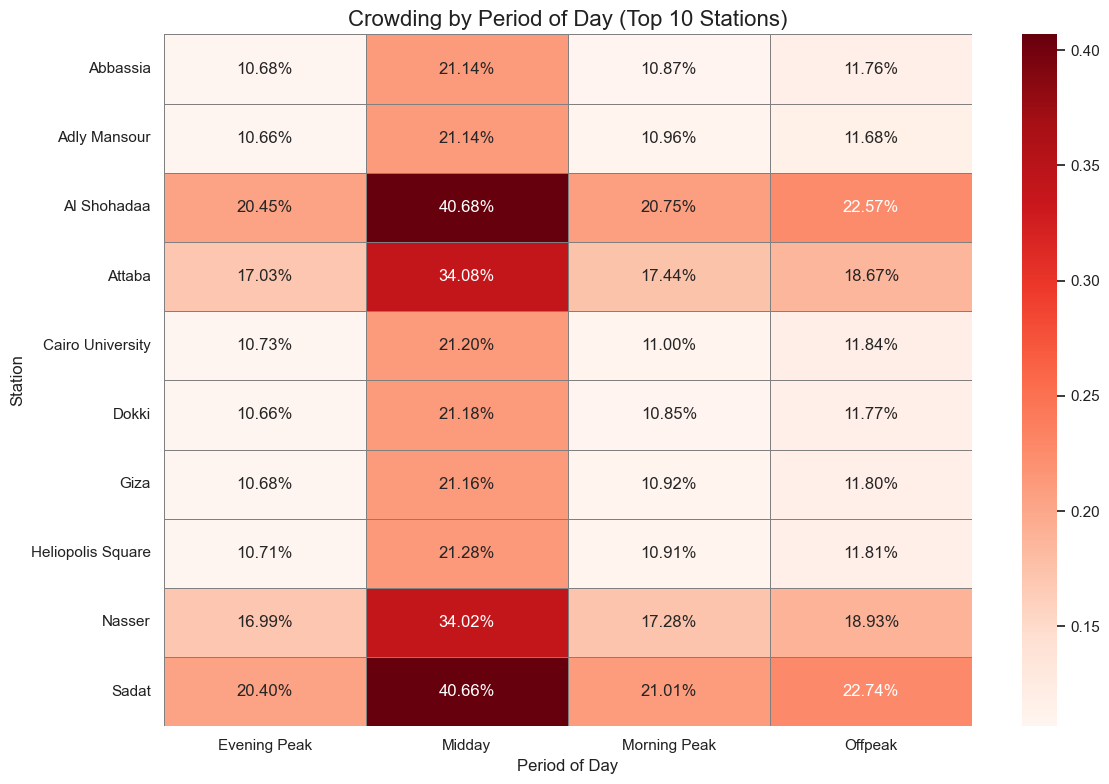

In [ ]:
crowding_data = passenger.merge(
    Stations[["station_id", "station_name", "passenger_base"]], 
    on="station_id", how="left"
)

crowding_data["annual_capacity"] = crowding_data["passenger_base"] * 365

period_passengers = crowding_data.groupby(
    ["station_id", "station_name", "period_of_day"]
)["passenger_count"].sum().reset_index()

station_totals = period_passengers.groupby(
    ["station_id", "station_name"]
)["passenger_count"].sum().reset_index()

top10_stations = station_totals.sort_values("passenger_count", ascending=False).head(10)

period_top10 = period_passengers[period_passengers["station_id"].isin(top10_stations["station_id"])]

period_top10 = period_top10.merge(
    Stations[["station_id", "passenger_base"]], on="station_id", how="left"
)
period_top10["annual_capacity"] = period_top10["passenger_base"] * 365
period_top10["crowding_ratio"] = period_top10["passenger_count"] / period_top10["annual_capacity"] / 100

heatmap_data = period_top10.pivot_table(
    index="station_name", columns="period_of_day", values="crowding_ratio", fill_value=0
)

plt.figure(figsize=(12,8))
sns.heatmap(
    heatmap_data, cmap="Reds", annot=True, fmt=".2%", linewidths=0.5, linecolor="gray"
)

plt.title("Crowding by Period of Day (Top 10 Stations)", fontsize=16, color=DARK_GRAY)
plt.xlabel("Period of Day")
plt.ylabel("Station")
plt.tight_layout()
plt.show()


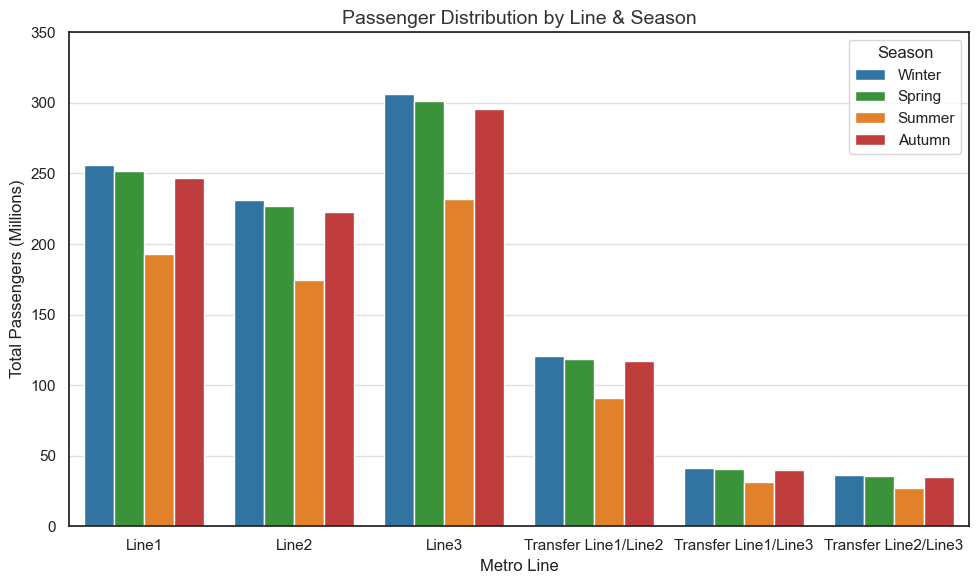

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

passenger["season"] = passenger["date"].dt.month.map(get_season)

passenger_line = passenger.merge(Stations[["station_id", "line_id"]], on="station_id")

line_season = (
    passenger_line.groupby(["line_id", "season"])["passenger_count"]
    .sum()
    .reset_index()
)
line_season["passenger_millions"] = line_season["passenger_count"] / 1e6

season_order = ["Winter", "Spring", "Summer", "Autumn"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=line_season,
    x="line_id",
    y="passenger_millions",
    hue="season",
    hue_order=season_order,
    palette=["#1f77b4", "#2ca02c", "#ff7f0e", "#d62728"] 
)

plt.title("Passenger Distribution by Line & Season", fontsize=14, color="#333")
plt.xlabel("Metro Line")
plt.ylabel("Total Passengers (Millions)")
plt.legend(title="Season", loc="upper right")
plt.ylim(0,350)

plt.tight_layout()
plt.show()


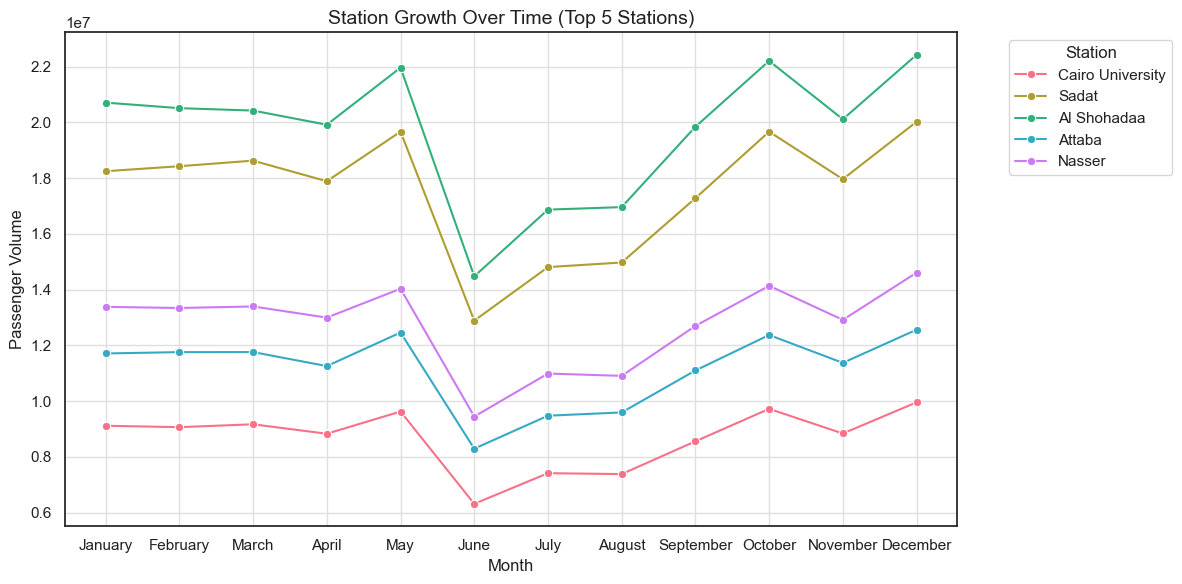

In [ ]:
station_growth["month"] = station_growth["date"].dt.month_name()

station_growth["month"] = pd.Categorical(
    station_growth["month"], categories=month_order, ordered=True
)

station_growth = station_growth.merge(
    Stations[["station_id"]],
    on="station_id", how="left"
)

top5_stations = (
    station_growth.groupby("station_name")["passenger_count"].sum()
    .nlargest(5).index
)

station_growth_top5 = station_growth[station_growth["station_name"].isin(top5_stations)]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=station_growth_top5,
    x="month", y="passenger_count",
    hue="station_name", marker="o"
)

plt.title("Station Growth Over Time (Top 5 Stations)", fontsize=14, color=DARK_GRAY)
plt.xlabel("Month")
plt.ylabel("Passenger Volume")

plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
